In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jul  9 17:45:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Đường dẫn đến thư mục chứa tập dữ liệu
path = '/content'

In [ ]:
!pip install wget
import wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=72412e0ab49bec7657662619d5cc0882db406aa95e267171310febc9ae606a41
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!wget -O data_GTSRB.zip -P /content https://husteduvn-my.sharepoint.com/:u:/g/personal/thach_hs182769_sis_hust_edu_vn/ETn9eNyG0JdKsiSviMoFU8kBvMsd_9a_NcQSIoWw7dRYkQ?download=1

--2022-07-08 14:17:46--  https://husteduvn-my.sharepoint.com/:u:/g/personal/thach_hs182769_sis_hust_edu_vn/ETn9eNyG0JdKsiSviMoFU8kBvMsd_9a_NcQSIoWw7dRYkQ?download=1
Resolving husteduvn-my.sharepoint.com (husteduvn-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to husteduvn-my.sharepoint.com (husteduvn-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/thach_hs182769_sis_hust_edu_vn/Documents/dulieu/data_GTSRB_png.zip?ga=1 [following]
--2022-07-08 14:17:46--  https://husteduvn-my.sharepoint.com/personal/thach_hs182769_sis_hust_edu_vn/Documents/dulieu/data_GTSRB_png.zip?ga=1
Reusing existing connection to husteduvn-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 320745704 (306M) [application/x-zip-compressed]
Saving to: ‘data_GTSRB.zip’

B.zip               100%[===================>] 305.89M  74.8MB/s    in 4.6s    

2022-07-08 14:17:51 (67.0 MB/s) - ‘data_GTSRB.zip’ saved [32

In [ ]:
!unzip -q /content/data_GTSRB.zip

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split

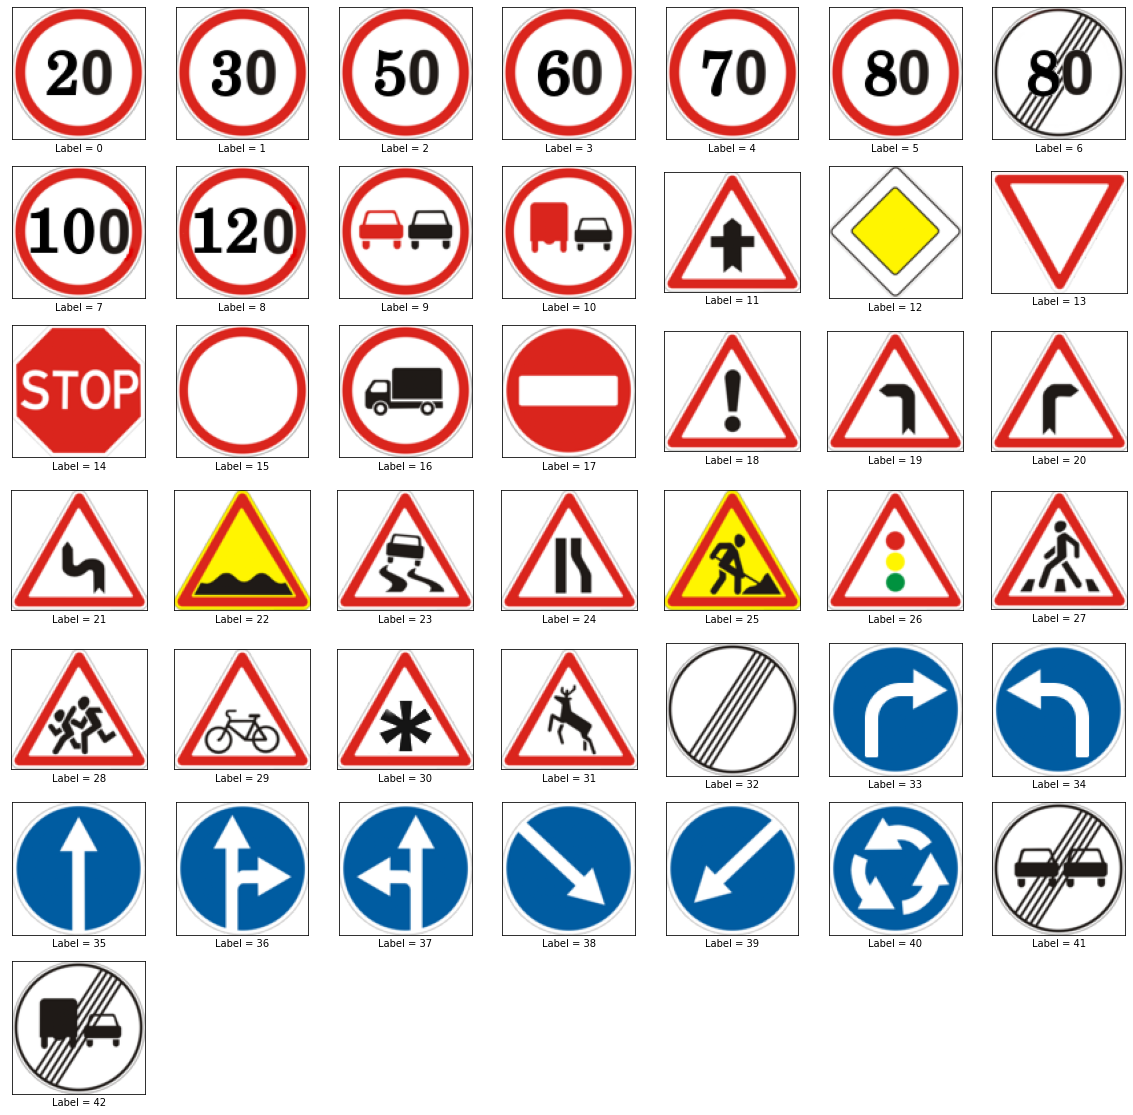

In [ ]:
# Visualizing all the different Signs  
plt.figure(figsize=(20, 20))
for i in range (0,43):
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Path = path + '/Meta/{}.png'.format(i)
  img = plt.imread(Path)
  plt.xlabel('Label = {}'.format(i))
  plt.imshow(img)

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


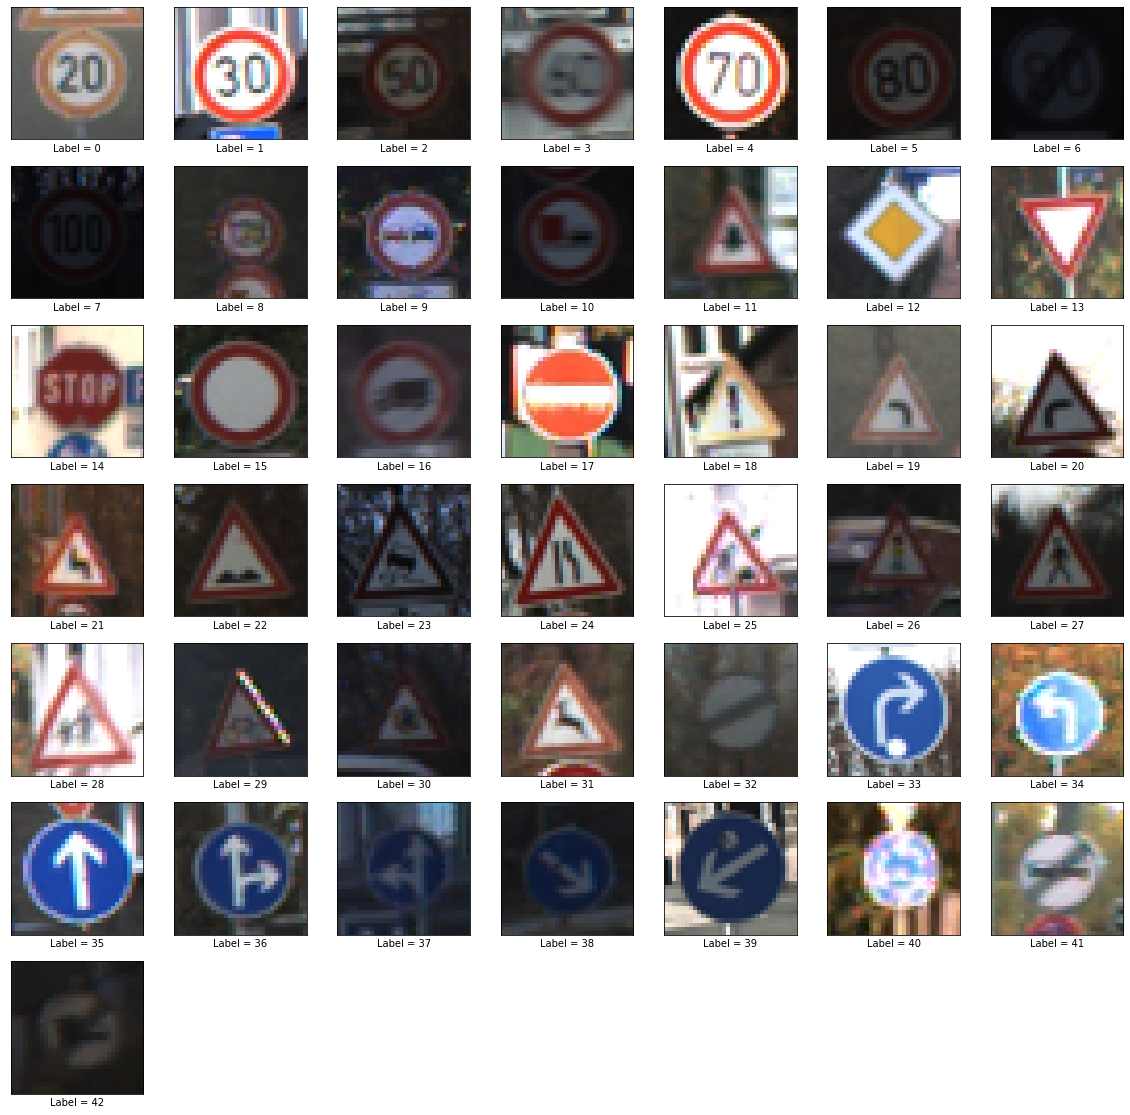

In [ ]:
# Visualizing all the different Signs
import pathlib
img_dir = pathlib.Path(path+"/Train")
plt.figure(figsize = (20,20))
index = 0
for i in range(43):
  plt.subplot(7, 7, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  sign = list(img_dir.glob(f'{i}/*'))[0]
  img = Image.open(sign)
  img = img.resize((32,32))
  plt.xlabel('Label = {}'.format(i))
  plt.imshow(img)

plt.show()

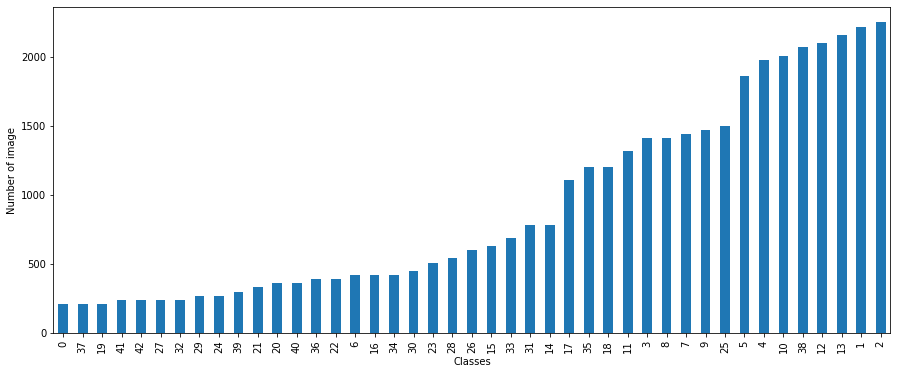

In [ ]:
# number of images in each class
data_dic = {}
for folder in os.listdir(path + "/Train"):
  data_dic[folder] = len(os.listdir(path + "/Train" + '/' + folder))

data_df = pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of image')
plt.show()

In [ ]:
data = []
labels = []
classes = len(classNames)
# cur_path = os.getcwd()
cur_path = "/content"

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, str(a)))
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [ ]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [ ]:
data[0]

array([[[105, 107, 105],
        [104, 106, 103],
        [107, 106,  92],
        ...,
        [170, 140, 108],
        [164, 153, 137],
        [118, 132, 117]],

       [[103, 106, 103],
        [106, 104, 100],
        [126, 117, 100],
        ...,
        [171, 128, 100],
        [168, 137, 113],
        [150, 136, 115]],

       [[101, 103,  99],
        [118, 109, 104],
        [148, 129, 127],
        ...,
        [178, 126,  91],
        [173, 129,  93],
        [162, 128, 111]],

       ...,

       [[ 89,  92,  89],
        [ 88,  89,  88],
        [ 86,  86,  86],
        ...,
        [ 80,  81,  80],
        [ 81,  82,  79],
        [ 83,  83,  81]],

       [[ 87,  88,  86],
        [ 89,  89,  88],
        [ 88,  88,  87],
        ...,
        [ 79,  81,  81],
        [ 80,  82,  80],
        [ 83,  84,  83]],

       [[ 87,  88,  88],
        [ 89,  89,  88],
        [ 87,  87,  86],
        ...,
        [ 78,  81,  81],
        [ 80,  82,  80],
        [ 82,  81,  81]]

In [ ]:
data

array([[[[105, 107, 105],
         [104, 106, 103],
         [107, 106,  92],
         ...,
         [170, 140, 108],
         [164, 153, 137],
         [118, 132, 117]],

        [[103, 106, 103],
         [106, 104, 100],
         [126, 117, 100],
         ...,
         [171, 128, 100],
         [168, 137, 113],
         [150, 136, 115]],

        [[101, 103,  99],
         [118, 109, 104],
         [148, 129, 127],
         ...,
         [178, 126,  91],
         [173, 129,  93],
         [162, 128, 111]],

        ...,

        [[ 89,  92,  89],
         [ 88,  89,  88],
         [ 86,  86,  86],
         ...,
         [ 80,  81,  80],
         [ 81,  82,  79],
         [ 83,  83,  81]],

        [[ 87,  88,  86],
         [ 89,  89,  88],
         [ 88,  88,  87],
         ...,
         [ 79,  81,  81],
         [ 80,  82,  80],
         [ 83,  84,  83]],

        [[ 87,  88,  88],
         [ 89,  89,  88],
         [ 87,  87,  86],
         ...,
         [ 78,  81,  81],
        

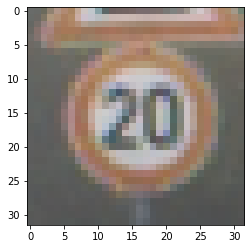

In [ ]:
plt.imshow(data[0])

In [ ]:
labels[0]

0

In [ ]:
from sklearn.utils import shuffle

In [ ]:
data = shuffle(data, random_state=42)
labels = shuffle(labels, random_state=42)

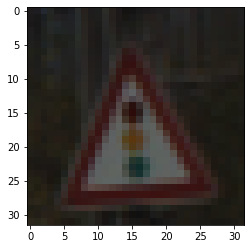

In [ ]:
plt.imshow(data[0])

In [ ]:
labels[0]

26

In [ ]:
classNames[labels[0]]

'Traffic signals'

In [ ]:
data = data.astype("float") / 255.0

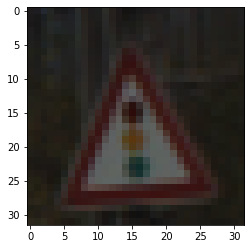

In [ ]:
plt.imshow(data[0])

In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
trainX, validX, trainY, validY = train_test_split(data, labels, test_size=0.2)

print(trainX.shape, validX.shape, trainY.shape, validY.shape)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [ ]:
validY

array([35, 42, 32, ..., 27, 23, 13])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
validY

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test = pd.read_csv('Test.csv')

testY = test["ClassId"].values
imgs = test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))

testX=np.array(data)

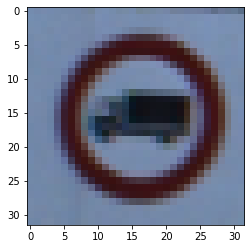

In [ ]:
plt.imshow(testX[0])

In [ ]:
testY[0]

16

In [ ]:
testX = testX.astype("float") / 255.0

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

In [ ]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 40.1 MB/s 


In [ ]:
model = Sequential()

In [ ]:
#định nghĩa đầu vào
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

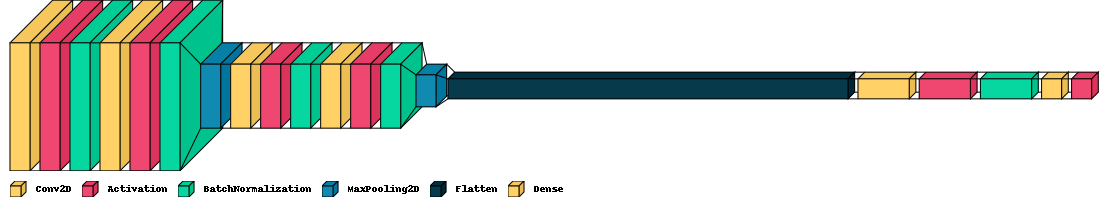

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.0001

In [ ]:
epochs = 100
batch_size = 32

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate)

In [ ]:
opt

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
980/980 [==============================] - 48s 36ms/step - loss: 2.1833 - accuracy: 0.3969 - val_loss: 1.1654 - val_accuracy: 0.6256
Epoch 2/100
980/980 [==============================] - 30s 30ms/step - loss: 1.2475 - accuracy: 0.6138 - val_loss: 0.8163 - val_accuracy: 0.7328
Epoch 3/100
980/980 [==============================] - 22s 23ms/step - loss: 0.9052 - accuracy: 0.7147 - val_loss: 0.5327 - val_accuracy: 0.8243
Epoch 4/100
980/980 [==============================] - 22s 22ms/step - loss: 0.6834 - accuracy: 0.7860 - val_loss: 0.3666 - val_accuracy: 0.8914
Epoch 5/100
980/980 [==============================] - 22s 22ms/step - loss: 0.5350 - accuracy: 0.8329 - val_loss: 0.2836 - val_accuracy: 0.9129
Epoch 6/100
980/980 [==============================] - 24s 24ms/step - loss: 0.4402 - accuracy: 0.8617 - val_loss: 0.2487 - val_accuracy: 0.9240
Epoch 7/100
980/980 [==============================] - 22s 22ms/step - loss: 0.3496 - accuracy: 0.8921 - val_loss: 0.1933 - val_ac

accu

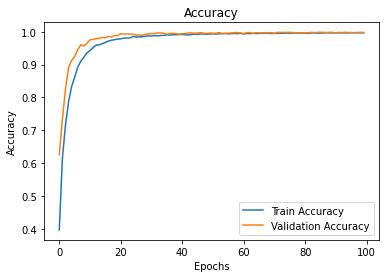

In [ ]:
plt.figure(0)
plt.plot(H.history['accuracy'], label = 'Train Accuracy')
plt.plot(H.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss

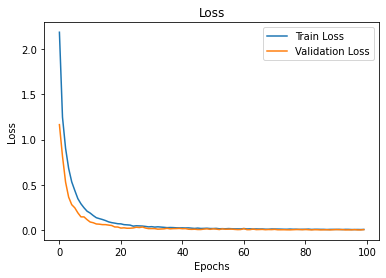

In [ ]:
plt.figure(0)
plt.plot(H.history['loss'], label = 'Train Loss')
plt.plot(H.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
%cd /content/drive/MyDrive/AInew

/content/drive/MyDrive/AInew


In [ ]:
model.save("nhandienbienbaogiaothongver9_adam_optim.h5")

In [ ]:
saved_model = tf.keras.models.load_model("nhandienbienbaogiaothongver9_adam_optim.h5")

NameError: ignored

In [ ]:
# Prediction
pred = np.argmax(saved_model.predict(testX),axis=1)
# Accuracy with the test data
#thang 100%
print('Test Data accuracy: ',accuracy_score(testY, pred)*100)

Test Data accuracy:  93.23832145684877


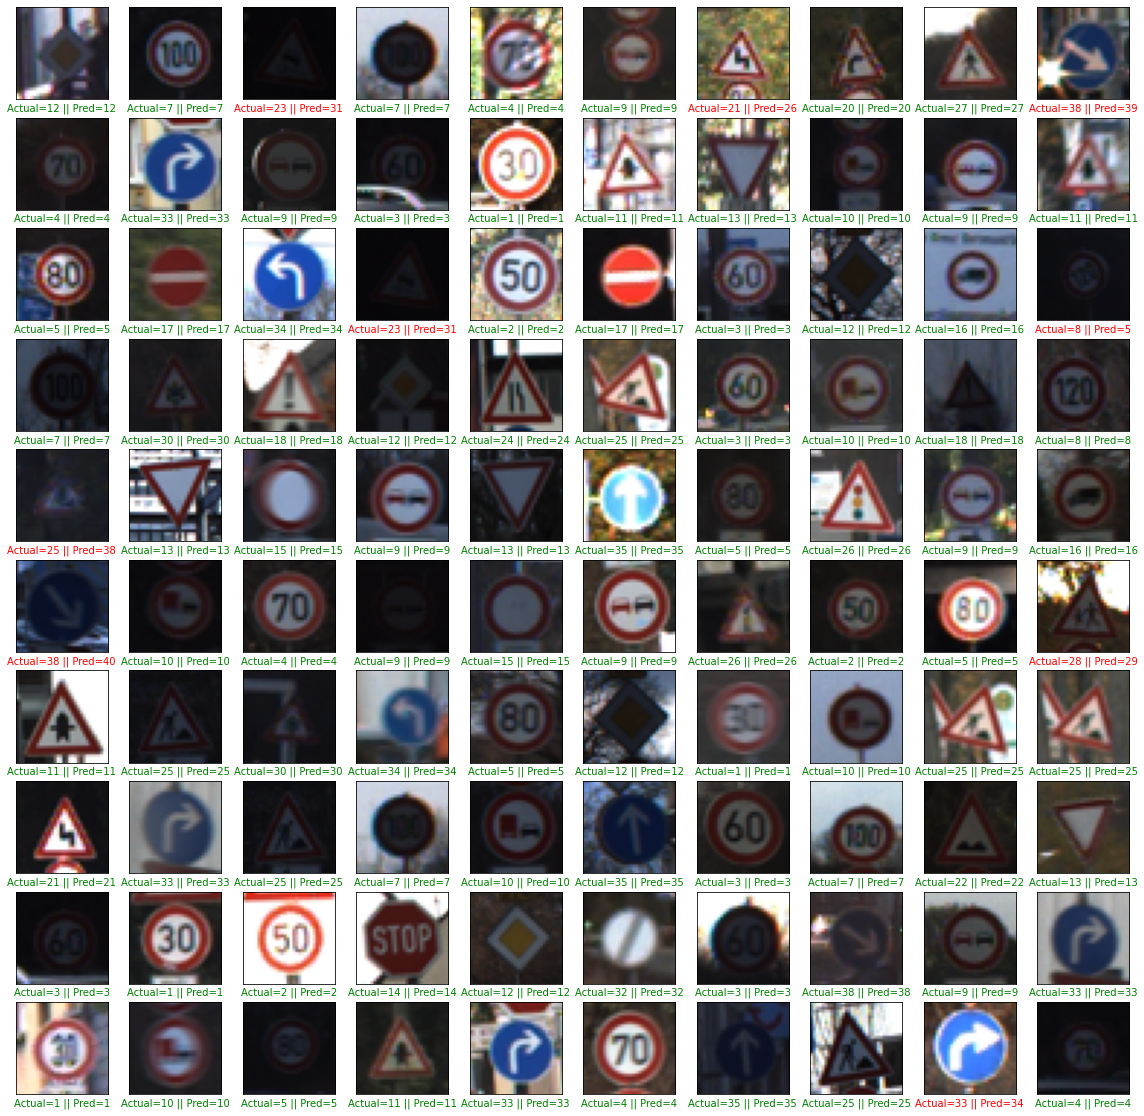

In [ ]:
# hiển thị 100 ảnh, màu xanh là nhận diện đúng, đỏ là nhận diện sai
plt.figure(figsize = (20, 20))

start_index = 10
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = testY[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(testX[start_index + i])
plt.show()

In [ ]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=testY, predictions=pred).numpy()

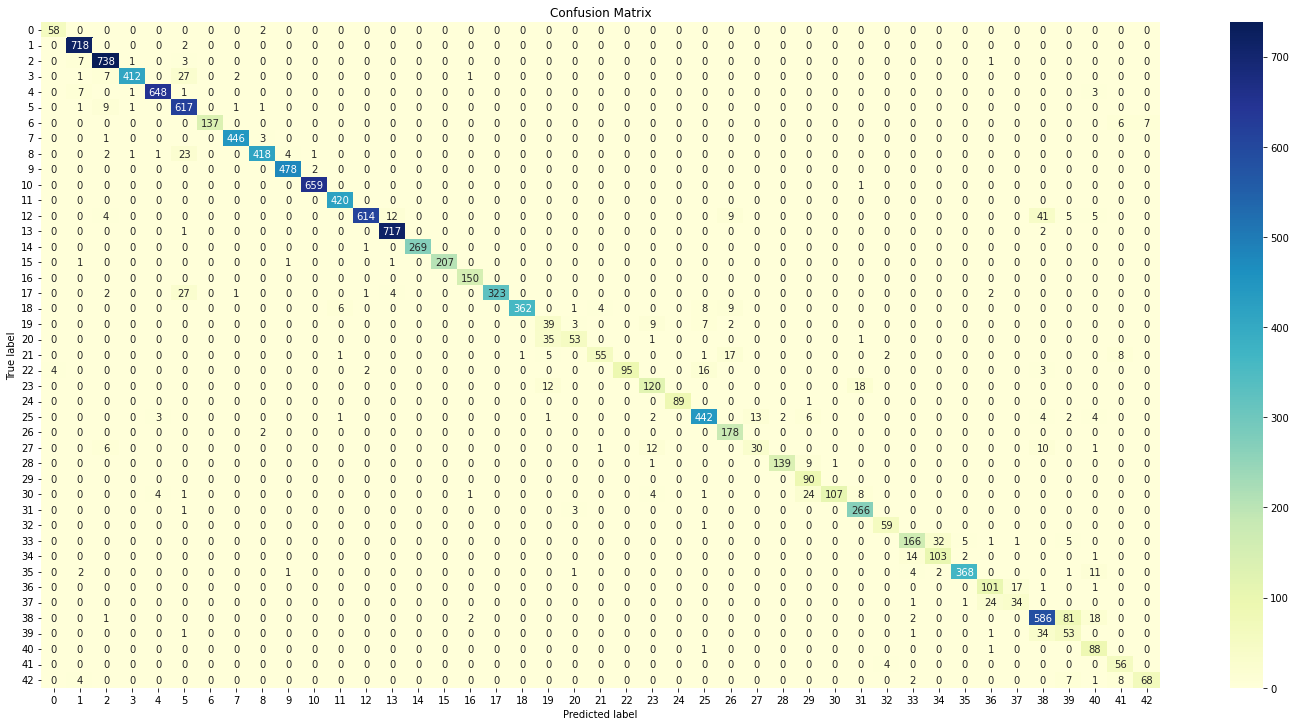

In [ ]:
# Plot confusion matrix
import seaborn as sns
figure = plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Test upload of webcam

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 27.8 MB/s 
     |████████████████████████████████| 57 kB 4.3 MB/s 
     |████████████████████████████████| 140 kB 71.7 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 62.7 MB/s 
     |████████████████████████████████| 2.3 MB 63.3 MB/s 
     |████████████████████████████████| 272 kB 35.2 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 212 kB 68.0 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 60.4 MB/s 
     |████████████████████████████████| 271 kB 68.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 68 kB

In [ ]:
%cd /content/drive/MyDrive/AInew

/content/drive/MyDrive/AInew


In [ ]:
import gradio as gr
import PIL
import numpy
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
#load the trained model to classify sign
from keras.models import load_model
model = tf.keras.models.load_model("/content/drive/MyDrive/AInew/nhandienbienbaogiaothongver9_adam_optim.h5")
#dictionary to label all traffic signs class.
classes = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}
#initialise GUI
def predict(img):
  img = numpy.expand_dims(img, axis=0)
  img=img/255.0
  predict_x = model.predict(img)
  pred = numpy.argmax(predict_x, axis=1)
  sign = classes[pred[0]]+", xác suất:" +"{:.2f}".format(numpy.amax(predict_x)*100)+ "%"
  return sign
gr.Interface(fn= predict, inputs = gr.inputs.Image(shape = (32,32)), outputs= "textbox" ).launch(share=True, debug = True)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://38668.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7fe7d3ac1b50>,
 'http://127.0.0.1:7860/',
 'https://38668.gradio.app')